In [2]:
#!/usr/bin/python
# -*- coding : utf-8 -*-
"""
stoRM FE logs instruments for data exploration

"""

'\nstoRM FE logs instruments for data exploration\n\n'

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### import msgpack / csv logs into dataframe

In [4]:
def msg_to_df(file_path):
    """
    Import msgpack as pandas DF
    """
    storm_df = pd.read_msgpack(file_path)
    return storm_df

In [5]:
def csv_to_df(file_path):
    """
    Import csv as pandas DF
    """
    data_type={'date' : object,'timestamp':float, 'thread':str,\
               'request_id' : object, 'message' : object, 'type' : object}
    storm_df = pd.read_csv(file_path, dtype=data_type)
    strom_df = pd.DataFrame(storm_df)
    return storm_df

#### This functions for each field of the parsed log counts the number of unique values that appear in that field.

In [6]:
def unique_count(storm_df,label):
    """
    Return number of unique values in storm_df[label]
    """
    return len(storm_df[label].unique())

In [7]:
def unique_count_all(storm_df):
    """
    Return DF, 2 columns: 1st DF columns names, 2nd number of column's unique values
    """
    #list(DataFrame) ci restituisce i nomi delle colonne in una lista
    labels = list(storm_df)
    counts = []
    for label in labels:
        counts.append(unique_count(storm_df,label))
    dizionario = { 'column': labels, 'unique values' : counts}
    uniques_df = pd.DataFrame.from_dict(dizionario)
    #uniques_df.columns = ['COLONNA','VALORI UNICI']
    return uniques_df.sort_values(by=['unique values'],ascending=False) 
    

#### For a 2 column dataframe ( name - value ) return a bar plot in log scale (if log = True)

In [8]:
def barrer_1_log(DF_2col, larg=15, alt=12, log=True,clr='purple'):
    """
    Recive only 2 cols DF, show and save BAR plot, y axis has optionally logaritmic scale
    """
    
    fig = plt.figure( figsize=(larg,alt) )
    ax = fig.add_subplot(111)
    #plt.title('Number of unique values for each column of a stoRM FE log DataFrame'.upper())
    
    labels = list(DF_2col)
    annotation = str(DF_2col)
    
    x_ann = len( DF_2col[labels[0]] )
    y_ann = max( DF_2col[labels[1]] )
    
    plt.xlabel( (labels[0] + 's').upper())
    plt.ylabel( labels[1].upper() )
    
    ax.grid(zorder=0)
    if log:
        ax.set_yscale('log')
    ax.bar( DF_2col[labels[0]] , height= DF_2col[labels[1]] ,width=0.4, color=clr )
    
    
    #plt.xticks(range(len(DF_2col[labels[0]])), DF_2col[labels[0]], rotation='vertical')
    
    ax.set_xticklabels(DF_2col[labels[0]],fontsize='x-large',rotation='vertical')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.text(x_ann*1.1, y_ann*0, annotation, withdash=False,fontsize=10)
    #plt.savefig('valori_unici_1daylog.jpg',figsize=(14, 11),dpi=600)
    #plt.subplots_adjust(right=0.7)
    #fig.savefig( 'valori_unici_1daylog_parsed_message.jpg', figsize=(larg, alt), dpi=300, bbox_inches='tight')
    fig.savefig(raw_input('Enter figure name ')+'.eps',format='eps', dpi=1000,bbox_inches='tight')
    plt.show()
    DF_2col.to_csv('valori_unici_1daylog_parsed_message.csv')

    

#### Functions that count the occurences of each unique values in each field pf the log DF

In [9]:
def most_frequent(storm_df, label):
    """
    for a stoRM DF return another 2 columns DF, 1st column contains unique values, 2nd column contains occurrences of that unique value
    """
    val_freq_df = storm_df[label].value_counts().to_frame()
    val_freq_df = pd.DataFrame({label : list(val_freq_df.index), 'occurrences' : list(val_freq_df.values)},columns=[label,'occurrences'])
    
    #check for missing value:
    #if (reduce(lambda x, y: x+y, val_freq_df['occurrences']) != len(storm_df[label])):
    #    print "SOMETHING GONE WRONG" 
        
    return val_freq_df

In [10]:
def barrer2(d2_df, legend=False,larg=16,alt=5):
    labels = list(d2_df)
    annotation = str(d2_df)
    
    x_ann = len(d2_df[labels[0]])
    y_ann = max(d2_df[labels[1]])
    
    fig = plt.figure(figsize=(larg,alt))
    plt.title(str(labels[0] + ' occurrences').upper())
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    
    #if max(d2_df[labels[0]]) > 10:
    #    plt.bar(list(range(0,len(d2_df[labels[0]]),1)), height= d2_df[labels[1]], color='purple')
    #else:
    plt.bar(d2_df[labels[0]], height= d2_df[labels[1]], color='green',width=0.5)
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if legend:
        plt.text(x_ann*1.1, y_ann*0, annotation, withdash=False,fontsize=12)
    plt.xticks(list(range(0,len(d2_df[labels[0]]),1)),list(d2_df[labels[0]]),rotation=90)
    #plt.subplots_adjust(right=0.7)
    plt.savefig(raw_input('figure name: ') + '.eps',format='eps',dpi=1000,bbox_inches='tight')
    plt.show()
    

##### most frequent (type 2) values for most frequent (type 1) values 

Per un data colonna del dataframe questa funzione trova i valori unici e ne conta la frequenza disponendoli in ordine discendente per valore di freq, selezionatone uno con N, dove N è la sua posizione a partire dall'alto la funzione ci filtra il DF restituendo un DF con tutte le righe per cui il valore della colonna è quello che abbiamo selezionato.

In [11]:
def numb_of_for(storm_df, label1, N=0):
    cella_studio = most_frequent(storm_df, label1)[label1][N]
    filtered_df = storm_df.loc[storm_df[label1] == cella_studio]
    return filtered_df

In [12]:
def numb_of_for_val_occ(storm_df, label1, label2, N=0):
    cella_studio = most_frequent(storm_df, label1)[label1][N]
    filtered_df = storm_df.loc[storm_df[label1] == cella_studio]
    
    return most_frequent(filtered_df,label2)

In [13]:
def barrer3(storm_df, label1, label2, N=0,  legend=False, larg=12,alt=8):
    
    d2_df = numb_of_for_val_occ(storm_df, label1, label2, N)
    
    labels = list(d2_df)
    annotation = str(d2_df)
    
    x_ann = len(d2_df[labels[0]])
    y_ann = max(d2_df[labels[1]])
    
    fig = plt.figure(figsize=(larg,alt))
    plt.title(str('occorrenze di ' + labels[0] + ' per il ' + label1 + ' ' +storm_df[label1][N]+ '\n').upper())
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    
    if max(d2_df[labels[0]]) > 10:
        plt.bar(list(range(0,len(d2_df[labels[0]]),1)), height= d2_df[labels[1]], color='red')
    else:
        plt.bar(d2_df[labels[0]], height= d2_df[labels[1]], color='red')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if legend:
        plt.text(x_ann*1.1, y_ann*0, annotation, withdash=False,fontsize=10)
    plt.xticks(list(range(0,len(d2_df[labels[0]]),1)),list(range(0,len(d2_df[labels[0]]),1)),rotation=90)
    plt.savefig('esempio' + 'MESSAGE' + '.jpg',figsize=(14, 11),dpi=200)
    plt.show()
    

#### Functions for Time manipulation  \[event end - event start (request-id)\]

In [14]:
def jingle3(DF):
    DF = DF.sort_values('request_id',ascending=True)
    i=0
    lista_tk, lista_tmax, lista_tmin = [0], [0], [0]
    lunghezza_max = (len(DF['request_id'])-1)
    while i != lunghezza_max:
        if DF['request_id'].values[i] != lista_tk[-1]:
            lista_tk.append(DF['request_id'].values[i])
            lista_tmin.append(DF['timestamp'].values[i])
            lista_tmax.append(DF['timestamp'].values[i])
            
            j=0
             
            
            while DF['request_id'].values[i+j] == lista_tk[-1]:
                if DF['timestamp'].values[i+j] < lista_tmin[-1]:
                        lista_tmin[-1] = DF['timestamp'].values[i+j]
                elif DF['timestamp'].values[i+j] > lista_tmin[-1]:
                    if DF['timestamp'].values[i+j] > lista_tmax[-1]:
                        lista_tmax[-1] = DF['timestamp'].values[i+j]
                    else:
                        pass
                else:
                    pass
                    
                
                if ((i+j)<lunghezza_max):
                    j+=1
                else:
                    break
        i+=1
        
    lista_tk.pop(0)
    lista_tmax.pop(0)
    lista_tmin.pop(0)
    lista_dt=[M-m for M,m in zip(lista_tmax,lista_tmin)]
        
    return pd.DataFrame.from_dict({'request_id':lista_tk, \
                                   'delta_t':lista_dt})
    
    

In [15]:
def merge_w_occ(storm_df):
    """
    execute alternative1 and most_frequent on H rows of storm_df; then merge 2 resulting DFs by token in one DF
    """
    df1 = jingle3(storm_df)
    df2 = most_frequent(storm_df, 'request_id')
    final = pd.merge(df1,df2, on='request_id')
    #final = final['TOKEN','DELTA_T','occurrences']
    return final

In [16]:
def merge_w_origin(storm_df):
    return pd.merge(storm_df, merge_w_occ(storm_df))

In [17]:
def scatterer(scatter_df):
    """
    plots DF resulting from merge_w_occ
    """
    fig = plt.figure(figsize=(30,20))
    plt.scatter(scatter_df['occurrences'],scatter_df['delta_t'],s=0.4)
    #plt.text(10, 0, annotation, withdash=False,fontsize=10)
    #plt.subplots_adjust(right=0.7)
    plt.savefig('testbb.jpg', bbox_inches='tight', dpi=600)
    plt.grid()
    plt.show()

------------------------------------------------------------------------------------------------------------------

In [18]:
def start_end(storm_df):
    try:
        print 'log started at: ' + str(storm_df.head(1)['datetime'].values)
        print 'log ended at: ' + str(storm_df.tail(1)['datetime'].values)
    except KeyError:
        print 'log started at: ' + str(storm_df.head(1)['date ISO-8601'].values)
        print 'log ended at: ' + str(storm_df.tail(1)['date ISO-8601'].values)
        
    

In [19]:
def specific_locator(storm_df, label, locator):
    return storm_df.loc[storm_df[label] == locator]

In [20]:
def multi_scatterer(list_of_df):
    fig = plt.figure(figsize=(30,20))
    i=0
    for df in list_of_df:
        plt.scatter(df['occurrences'],df['delta_t'],s=2+i)
        i+=5
    #plt.text(10, 0, annotation, withdash=False,fontsize=10)
    #plt.subplots_adjust(right=0.7)
    plt.legend(('info\'s tokens', 'warn\'s tokens','SRM_DE\'s tokens','SRM_IR\'s tokens' ,'SRM_IE\'s tokens'), fontsize='xx-large')
    plt.xlabel('MESSAGE OCCURRENCES',fontsize='xx-large')
    plt.ylabel('TIME LAPSE (s)',fontsize='xx-large')
    plt.grid()
    plt.show()
    fig.savefig(raw_input('Enter figure name ')+'.eps',format='eps', dpi=1000)

In [21]:
def multi_scatterer_v2(lista_df):
    fig = plt.figure(figsize=(30,20))
    #ax = fig.add_subplot(111)
    i=0
    for df in lista_df:
        plt.scatter(df['occurrences'],df['delta_t'],s=10+i)
        i+=10
    #plt.text(10, 0, annotation, withdash=False,fontsize=10)
    #plt.subplots_adjust(right=0.7)
    plt.xticks(range(0,int(max(lista_df[0]['occurrences'])),10), fontsize='xx-large')
    plt.yticks(range(0,int(max(lista_df[0]['delta_t'])),10), fontsize='xx-large')
    #ax.set_yticklabels(fontsize='x-large')
    
    plt.xlabel('Number of messages for the request-id'.upper(), fontsize=20)
    plt.ylabel('Elapsed time from first \'till last request-id appearance'.upper() + (' (s)'), fontsize=20)
    
    plt.legend(('info\'s request-id', 'warn\'s request-id','SRM_DE\'s request-id','SRM_IR\'s request-id' ,'SRM_IE\'s request-id'), fontsize='xx-large')
    plt.grid()
    plt.show()
    fig.savefig(raw_input('Enter figure name ')+'.jpg', dpi=400,bbox_inches='tight')

In [22]:
def area_selector(storm_df, dt_start=0, dt_end=100, msg_start=0, msg_end=100):
    """
    Cut from a DF prepared for the scatter plot the area we desire
    Return a DF
    """
    new_df = storm_df.loc[storm_df.delta_t <= dt_start]\
    .loc[ storm_df.delta_t <= dt_end ]\
    .loc[ storm_df.occurrences <= msg_start]\
    .loc[ storm_df.occurrences <= msg_end]
    return new_df

In [23]:
def pupone(storm_df):
    """
    The DF recived must have time.
    """
    pass

# -------------------------------------------------------------------------------------------------------

In [24]:
DF = csv_to_df('moccammmeta.csv')

In [24]:
start_end(DF)

log started at: ['2018-10-30T00:00:00.000Z']
log ended at: ['2018-10-30T23:59:59.972Z']


In [25]:
list(DF)

['Unnamed: 0',
 'date ISO-8601',
 'timestamp',
 'type',
 'thread',
 'request_id',
 'message',
 'DN',
 'Request',
 'ip',
 'num',
 'requested_token',
 'result',
 'startup',
 'surl',
 'delta_t',
 'occurences']

In [ ]:
display(DF.head())

In [27]:
d2_df = DF.loc[DF.type == 'WARN']

In [ ]:
display(d2_df)

In [91]:
d2_df = most_frequent(DF, 'thread')

figure name: threads_occurences_kibana


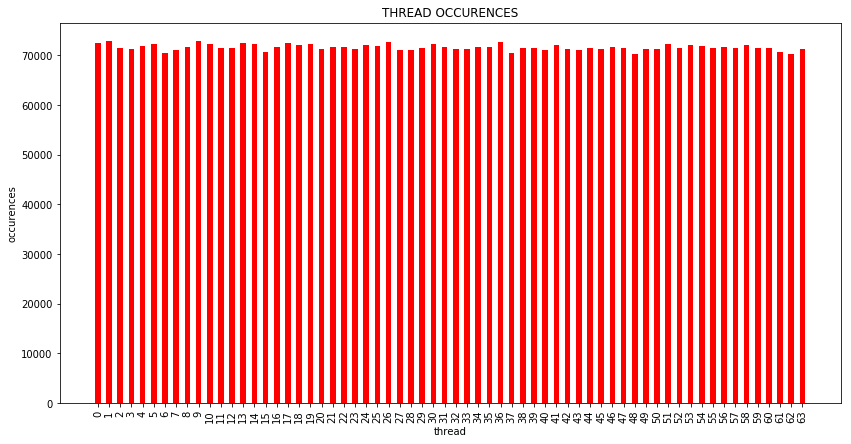

In [104]:
barrer2(d2_df.sort_values('thread'),alt=7,larg=14)

In [25]:
b = most_frequent(DF, 'request_id')

In [ ]:
barrer2(b.head(50),larg=18,alt=10)

In [51]:
b = most_frequent(DF, 'Request')

In [57]:
len(DF)

4585705

In [54]:
len(b)

18

In [ ]:
barrer_1_log(b,larg=18,alt=10,clr='teal')

In [58]:
b = most_frequent(DF, 'result')

In [ ]:
barrer_1_log(b,lar\g=18,alt=10,clr='pink')

sono 13 seppure nel unique values count vengono rappresentati come 14 perchè l'unique values count conta anche il NAN

# -------------------------------------------------------------------------------------------------------

In [29]:
del DF

In [51]:
storm_df = pd.read_csv('stoRM_FE_kibana_parsed.csv')

In [52]:
start_end(storm_df)

log started at: ['2018-10-30T00:00:00.000Z']
log ended at: ['2018-10-30T23:59:59.986Z']


In [53]:
list(storm_df)

['date ISO-8601',
 'timestamp',
 'type',
 'thread',
 'request_id',
 'message',
 'DN',
 'Request',
 'ip',
 'num',
 'requested_token',
 'result',
 'startup',
 'surl']

In [34]:
storm_df = storm_df.rename(index=str, columns={"token": "request_id"})

In [54]:
df_scatter = merge_w_occ(storm_df)

In [55]:
storm_df = pd.merge(storm_df,df_scatter, on='request_id').sort_values('timestamp')

In [56]:
list(storm_df)

['date ISO-8601',
 'timestamp',
 'type',
 'thread',
 'request_id',
 'message',
 'DN',
 'Request',
 'ip',
 'num',
 'requested_token',
 'result',
 'startup',
 'surl',
 'delta_t',
 'occurrences']

In [42]:
DF = DF.rename(index=str, columns={'occurences':'occurrences'})

In [43]:
def data_prep_scatter(DF):
    df_scatter = DF[['request_id','delta_t','occurrences']]
    df_warn_scatter = DF.loc[DF['type'] == 'WARN'][['request_id','delta_t','occurrences']]
    df_IE_scatter = DF.loc[DF['result']== 'SRM_INTERNAL_ERROR'][['request_id','delta_t','occurrences']]
    df_DE_scatter = DF.loc[DF['result']== 'SRM_DUPLICATION_ERROR'][['request_id','delta_t','occurrences']]
    df_IR_scatter = DF.loc[DF['result']== 'SRM_INVALID_REQUEST'][['request_id','delta_t','occurrences']]
    lista_df = [ df_scatter,df_warn_scatter, df_IR_scatter, df_DE_scatter,  df_IE_scatter]
    return lista_df


In [ ]:
multi_scatterer_v2(data_prep_scatter(DF))

In [57]:
df_warn_scatter = storm_df.loc[storm_df['type'] == 'WARN'][['request_id','delta_t','occurrences']]

In [ ]:
display(df_warn_scatter)

In [58]:
df_IE_scatter = storm_df.loc[storm_df['result']== 'SRM_INTERNAL_ERROR'][['request_id','delta_t','occurrences']]

In [ ]:
display(df_IE_scatter)

In [59]:
df_DE_scatter = storm_df.loc[storm_df['result']== 'SRM_DUPLICATION_ERROR'][['request_id','delta_t','occurrences']]

In [60]:
df_IR_scatter = storm_df.loc[storm_df['result']== 'SRM_INVALID_REQUEST'][['request_id','delta_t','occurrences']]

Tentativo di visualizzare in un solo plot di tipo scatter come si posizionano i punti per diversi request_id che rispondono ognuno a carattteristiche diverse.

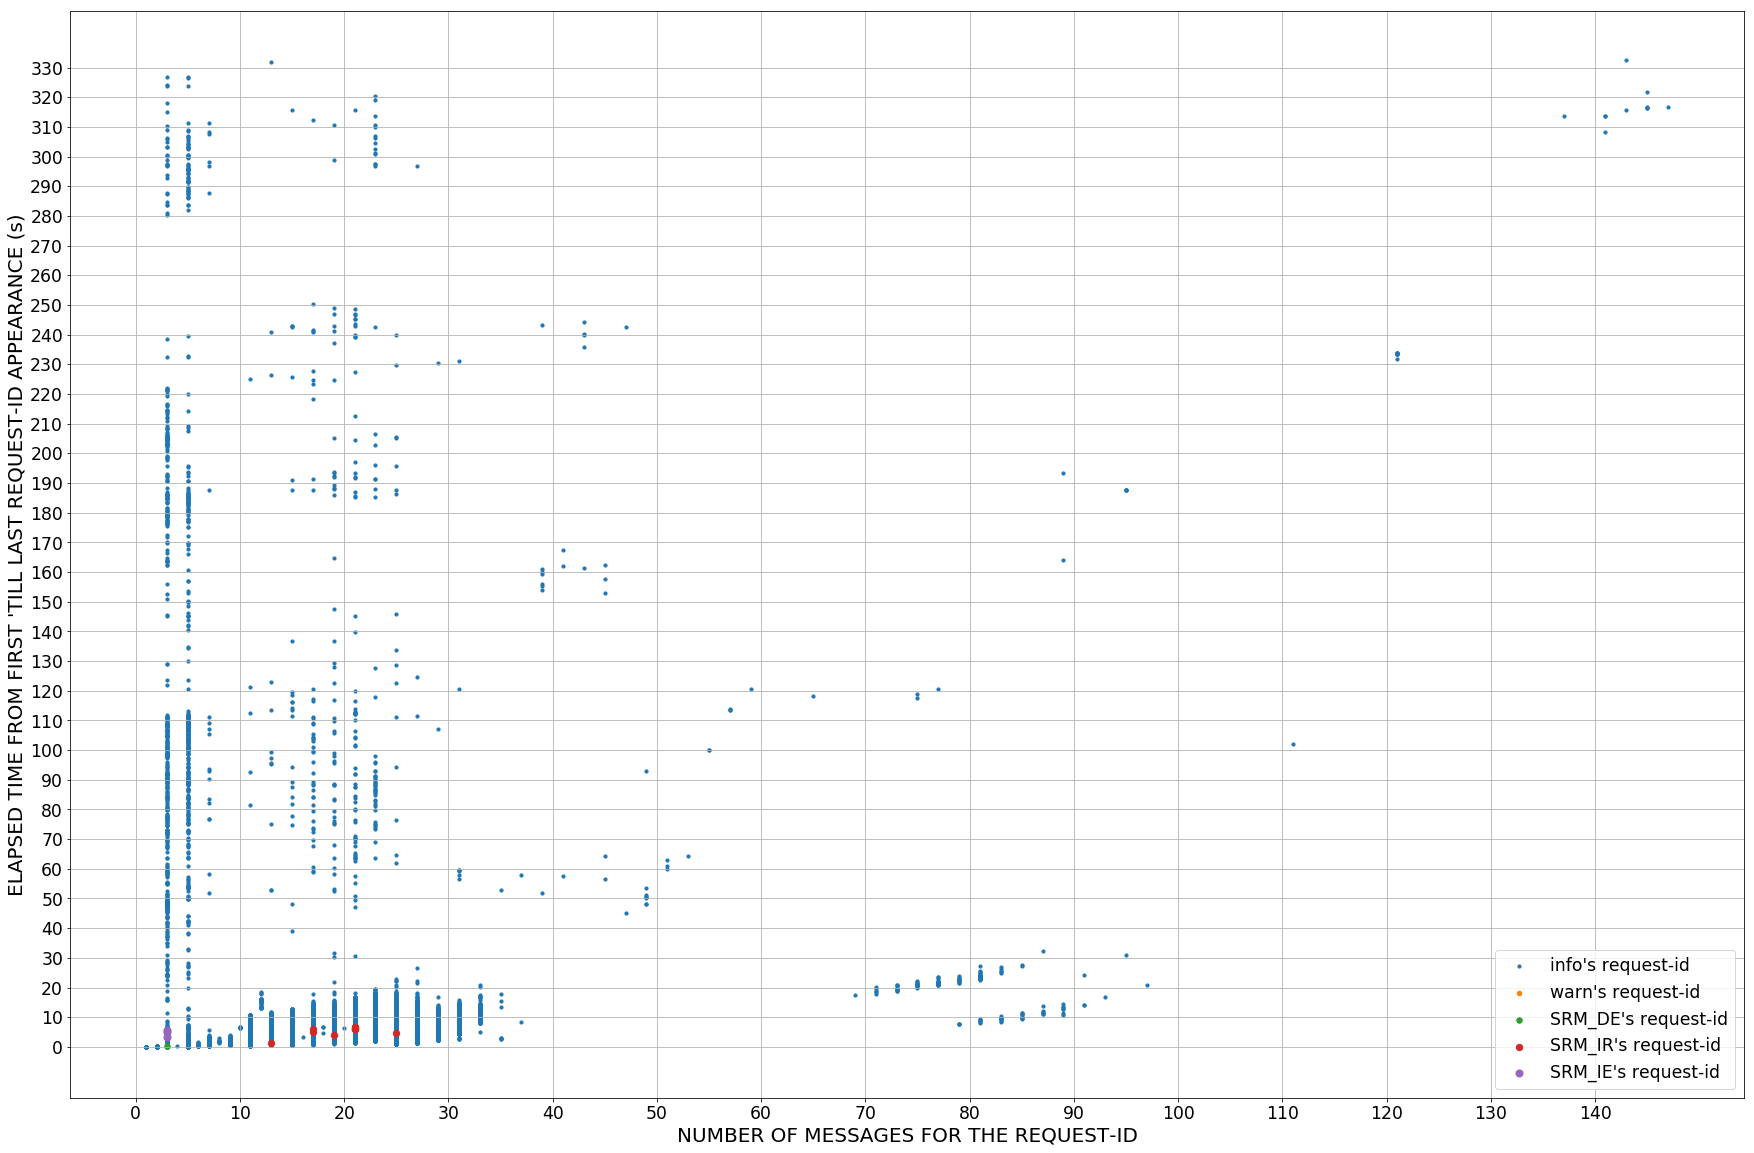

Enter figure name light_log_scatter


In [61]:
lista_df = [ df_scatter.loc[df_scatter['request_id'] != '?'],df_warn_scatter, df_IR_scatter, df_DE_scatter,  df_IE_scatter]
multi_scatterer_v2(lista_df)

In [50]:
start_end(storm_df)

log started at: ['2018-08-31 03:21:41.374000']
log ended at: ['2018-09-01 03:26:37.759000']


In [62]:
start_end(storm_df)

log started at: ['2018-10-30T00:00:00.000Z']
log ended at: ['2018-10-30T23:59:59.986Z']


-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------

In [23]:
storm_df = pd.read_csv('stoRM_FE_kibana_parsed.csv')

In [24]:
list(storm_df)

['date ISO-8601',
 'timestamp',
 'type',
 'thread',
 'request_id',
 'message',
 'DN',
 'Request',
 'ip',
 'num',
 'requested_token',
 'result',
 'startup',
 'surl']

In [25]:
storm_df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

timestamp    1.540903e+09
thread       3.100000e+01
num          1.000000e+00
startup               NaN
Name: 0.5, dtype: float64

In [26]:
start_end(storm_df)

log started at: ['2018-10-30T00:00:00.000Z']
log ended at: ['2018-10-30T23:59:59.986Z']


In [27]:
df_scatter = merge_w_occ(storm_df)

In [28]:
storm_df = pd.merge(storm_df,df_scatter, on='request_id').sort_values('timestamp')

In [29]:
list(storm_df)

['date ISO-8601',
 'timestamp',
 'type',
 'thread',
 'request_id',
 'message',
 'DN',
 'Request',
 'ip',
 'num',
 'requested_token',
 'result',
 'startup',
 'surl',
 'delta_t',
 'occurences']

In [30]:
len(storm_df)

4585705

In [ ]:
len(storm_df['request_id'].unique())

In [33]:
df_warn_scatter = storm_df.loc[storm_df['type'] == 'WARN'][['request_id','delta_t','occurences']]

In [ ]:
display(df_warn_scatter)

In [35]:
df_IE_scatter = storm_df.loc[storm_df['result']== 'SRM_INTERNAL_ERROR'][['request_id','delta_t','occurences']]

In [ ]:
display(df_IE_scatter)

In [37]:
df_DE_scatter = storm_df.loc[storm_df['result']== 'SRM_DUPLICATION_ERROR'][['request_id','delta_t','occurences']]

In [38]:
df_IR_scatter = storm_df.loc[storm_df['result']== 'SRM_INVALID_REQUEST'][['request_id','delta_t','occurences']]

Tentativo di visualizzare in un solo plot di tipo scatter come si posizionano i punti per diversi request_id che rispondono ognuno a carattteristiche diverse.

In [ ]:
lista_df = [ df_scatter.loc[df_scatter['request_id'] != '?'],df_warn_scatter, df_IR_scatter, df_DE_scatter,  df_IE_scatter]
multi_scatterer(lista_df)

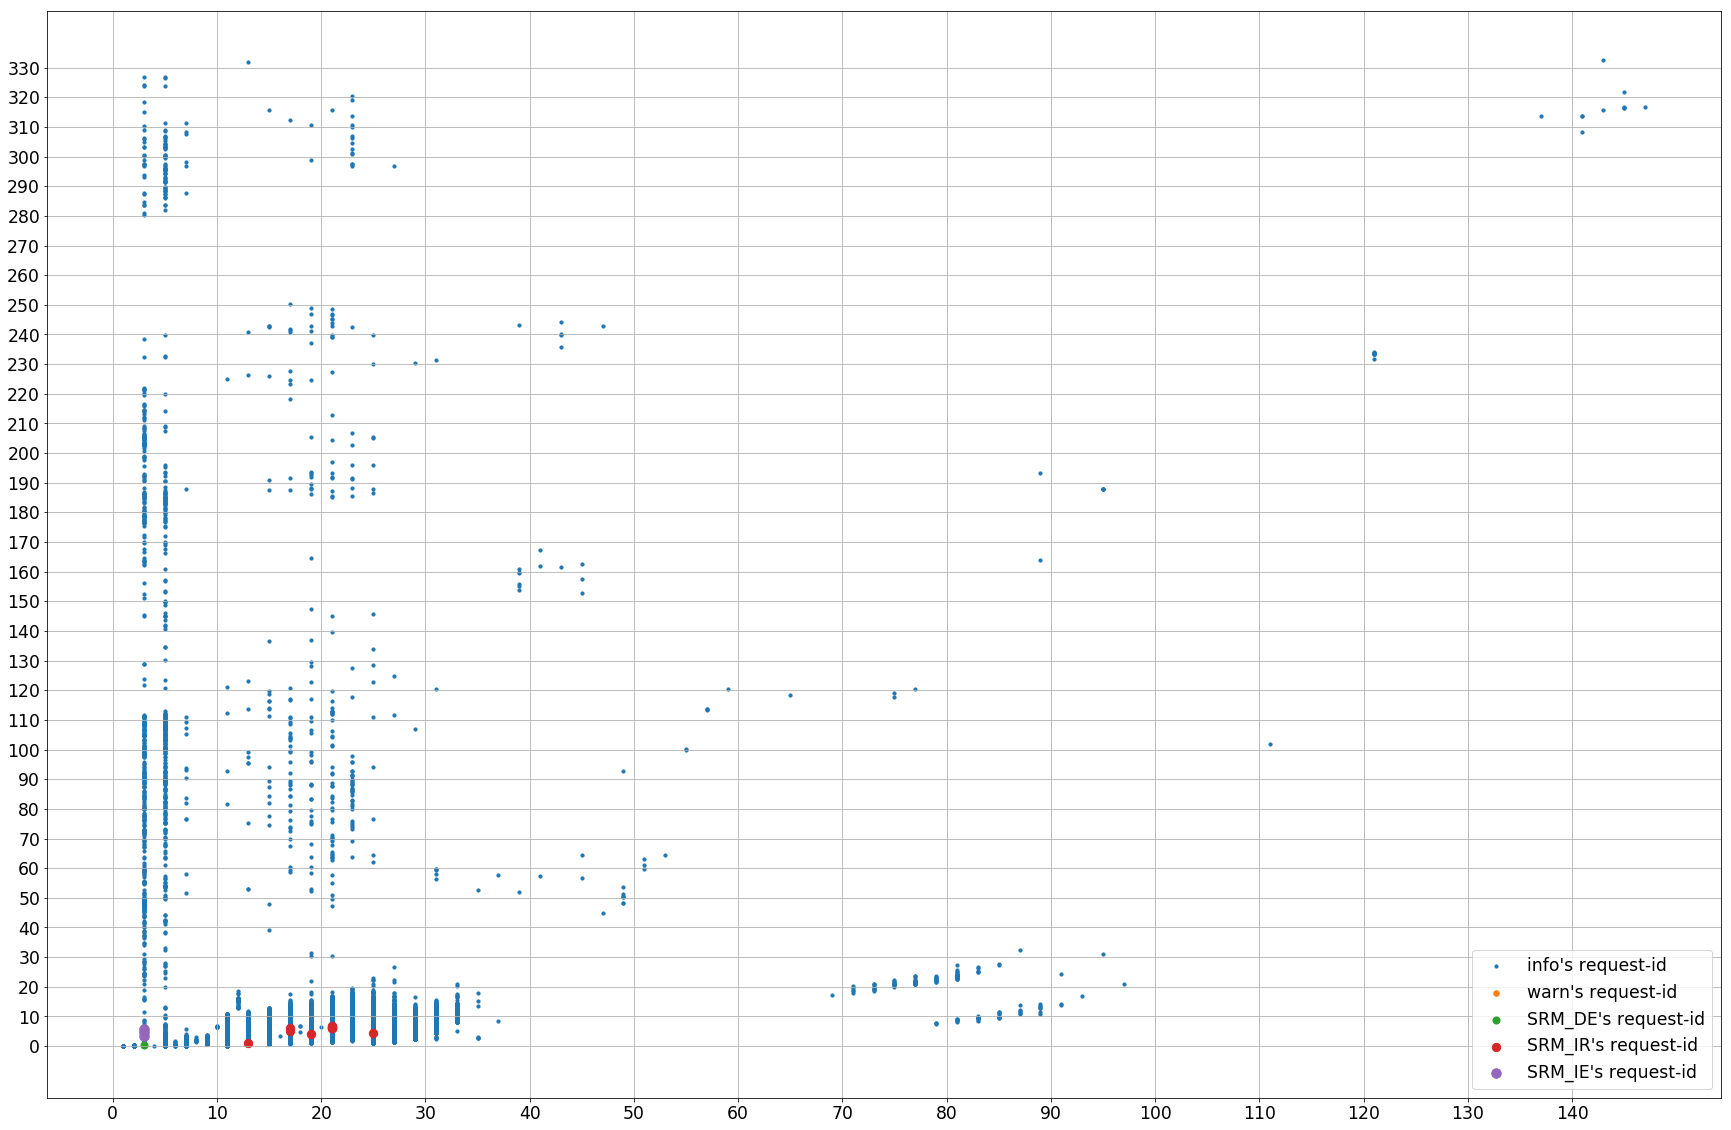

Enter figure name sni


In [85]:
multi_scatterer_v2(lista_df)

-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------

In [154]:
storm_df = csv_to_df('stoRM_FE_kibana_parsed.csv')

In [155]:
def time_seq_v2(storm_df):
    first_time = float(storm_df.head(1).timestamp)
    return pd.concat([storm_df,storm_df.transform({'timestamp':lambda x: x-first_t}).rename({'timestamp':'time_sequence'},axis=1)],sort=False,axis=1)

In [156]:
for i in range(10): print storm_df.timestamp[i]

1540857600.0
1540857600.0010002
1540857600.054
1540857600.054
1540857600.055
1540857600.055
1540857600.173
1540857600.2029998
1540857600.3
1540857600.302


In [157]:
new_df = time_seq_v2(storm_df)

In [158]:
len(new_df)

4585705

In [ ]:
display(new_df)

In [ ]:
most_frequent(new_df[:], 'Request')

Grafico che mostra tutte le possibili request che sono presenti in un log di storm FE in una giornata e la loro occorrenza (magari per due log di due giornate diverse)

Enter figure name most_frequent_request


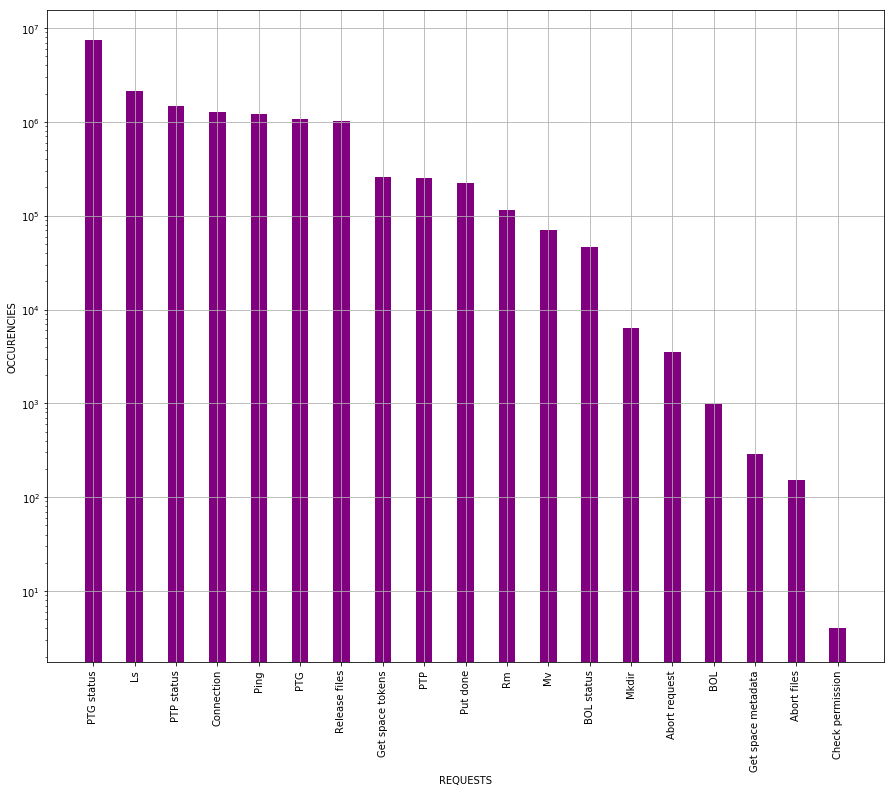

In [61]:
Requests = most_frequent(storm_df, 'Request')
barrer_1_log(Requests)

Enter figure name most_frequent_results


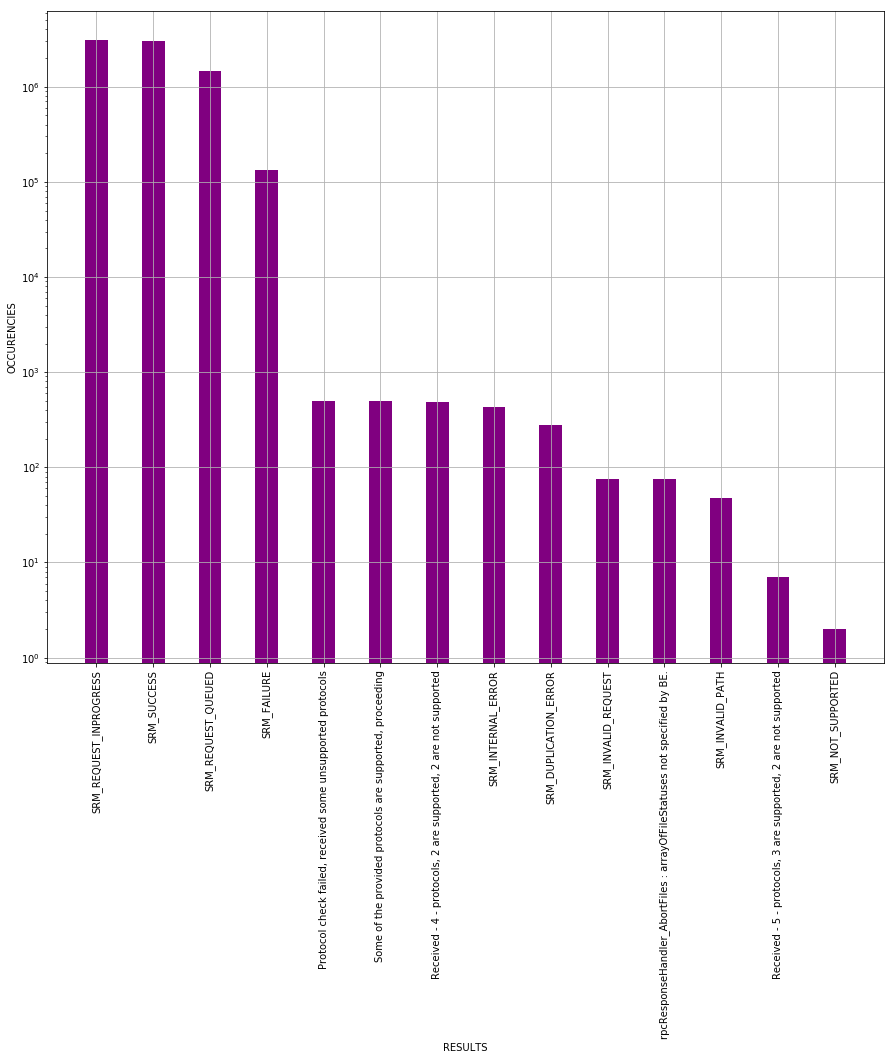

In [62]:
Request_results = most_frequent(storm_df, 'result')
barrer_1_log(Request_results)

-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------

In [ ]:
storm_df

In [16]:
DF = csv_to_df('fe-message_parsed.csv')

/home/gabriele/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2818: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [36]:
DF = DF.rename(index=str, columns={"token": "request_id"})

In [37]:
U = unique_count_all(DF)

Enter figure name test_req_id


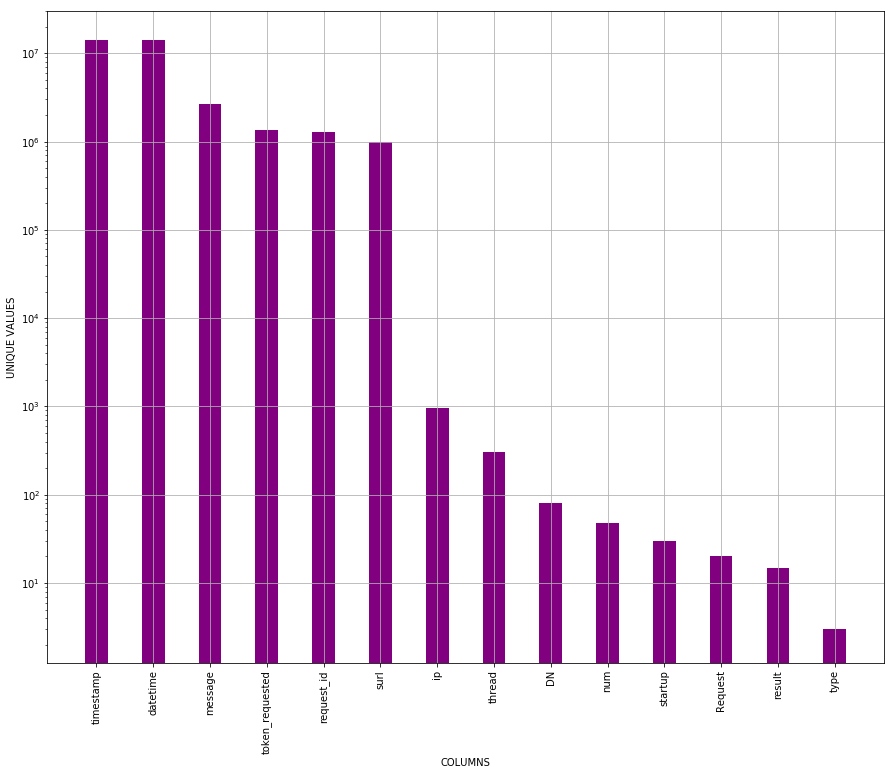

In [38]:
barrer_1_log(U)

**Example 0**: msg_to_df(fin)
* **Recive** path to storm frontend log
* **Return** storm dataframe

In [16]:
%time a = msg_to_df("/home/gabriele/storm-frontend-server.log-20180901.msg")

CPU times: user 8.69 s, sys: 4.9 s, total: 13.6 s
Wall time: 13.8 s


In [32]:
len(DF['token'].unique())

1277193

In [39]:
jingle3(DF).to_csv('token_durata.csv', index=False)

In [40]:
b= pd.read_csv('token_durata.csv')

In [45]:
c= most_frequent(DF,'request_id')

In [ ]:
scatterer(pd.merge(b.loc[b.request_id!='?'],c.loc[c.request_id!='?'], on='request_id'))

**Example 1**: unique_count(storm_df,label)
* **Recive** a storm frontend log file as DataFame, str wich is a DataFrame Column name.
* **Return** int, number of unique values for a DataFrame's column

In [ ]:
unique_count(a,'MESSAGE')

**Example 3**: unique_count_all( storm_df)
* **Recive** stoRM DataFrame
* **Return** DataFrame: 1st column is storm_df columns name, 2nd column number of unique values

In [ ]:
unique_count_all(a)

**Example 4**: barrer1( 2_dimension_DF, larghezza(opt), altezza(opt))
* **Recive** 2 columns dataframe
* **Save & Show** bar plot (bin in descendind order by unique values counts)

In [ ]:
a=

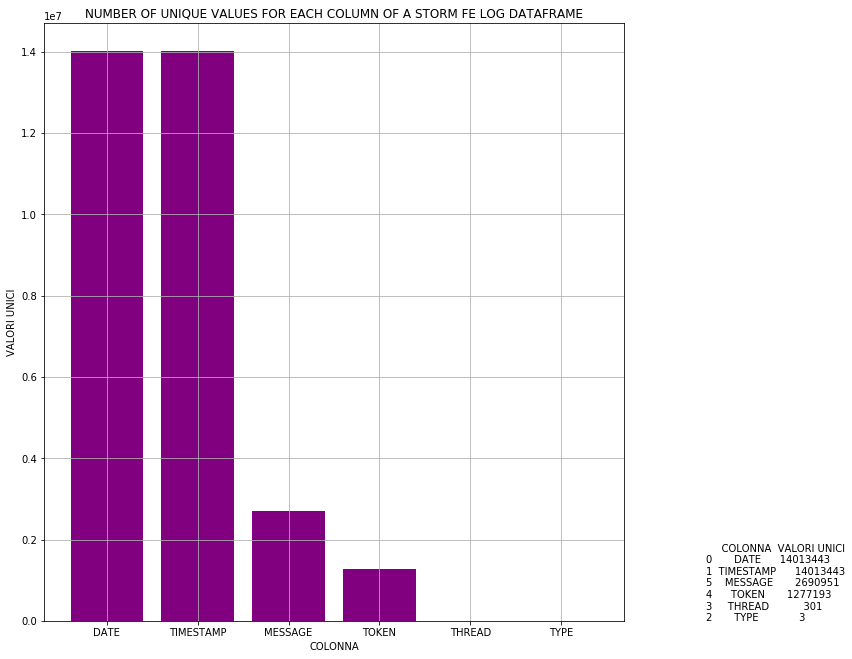

In [19]:
barrer1(unique_count_all(a))

**Example 5**: most_frequent( storm_df, label)
* **Recive** stoRM DataFrame, label str
* **Return** DF with 2 columns, 1st column contains unique values of label column, 2nd contains occurency of each one values

In [ ]:
b = most_frequent(a,'TOKEN')
display(b.head(10))

In [ ]:
df2 = a.loc[a.TOKEN == '7a9acc8e-72d8-4d97-b0a9-8728f4855c6e']
display(df2)

df2.to_csv('201_example.csv')
df2.TIMESTAMP.values[-1] - df2.TIMESTAMP.values[0]

**Examples 6**  barrer2( 2_dimension_dataframe, legend=False,larg=12,alt=8):
* **Recive** 2 dimension DF form-like unique_values - occurencies
* **Save & Reuturn** bar plot (bins in descending order by occurencies)

In [ ]:
for i in list(a):
    barrer2(most_frequent(a, i).head(100),True,25,11)

**Example 7**: numb_of_for_val_occ(storm_df, label1, label2, N)
* **Recive** storm complete DF, 2 columns labels, N (int) index
* **Return** DF of: taken a value with N index in column label1, return a value(unique)-occurencies dataframe of label2 column values

In [ ]:
c = numb_of_for_val_occ(a, 'TYPE', 'TOKEN', 2)
display(c)
c.to_csv('201_example.csv')

**Example 8**: barrer3(storm_df, label1, label2, N, larg, alt)
* **Recive**: stoRM DF, label of the 1st column on this value is executed a most frequent values and they are ordered in descening order by occurency, then N select one of this value.
* **Return** DataFrame of values occurency of label2 values connected with storm_df[label1][N]

In [ ]:
barrer3(a, 'TYPE', 'MESSAGE', 2, legend=True)

In [ ]:
d2_df = numb_of_for_val_occ(a, 'TYPE', 'MESSAGE', 2)
fig1, ax1 = plt.subplots()
ax1.pie(d2_df['OCCURENCIES'], autopct='%1.1f%%',shadow=False, startangle=90)
plt.xlabel(d2_df['MESSAGE'][0])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


    
#labels = list(d2_df)
plt.suptitle('MESSAGE ASSOCIATI A WARN')
plt.subplots_adjust(left=0.1)
plt.savefig('pie' + 'MESSAGE' + '.jpg',figsize=(14, 11),dpi=200, bbox_inches='tight')

plt.show()

## **-------------------------------------------------------------------------------------------------------------------------**

**Plot B**

Plot B: “numero di messagges per token nel logging di storm”. Il plot A vede un solo token. Discutendo, sembra valga la pena di fare un passo indietro e vedere piu’ token insieme e fare un plot del numero di messaggi per token, vedendo che distribuzione ha. Il problema e’ che in ogni Delta_t che uno guarda nel suo log di riferimento, ci saranno sempre token (processi utente, di fatto) in corso da prima, e token ancora non conclusi, insieme (e indistinguibili da essi) a sequenze di messaggi relativi a token che partono dopo l’inizio del log e finiscono prima della fine del log. <br> Naturalmente vorrei avere solo sequenze di messages del secondo tipo, ma in un sistema in produzione di cui vi vengono dati log “casualmente”, non e’ possibile. Questo plot B potenzialmente avra’ dentro anche durate corte “fake”, legate appunto a quei token che stanno finendo di loggare o stanno iniziando a farlo ma non finiranno entro la fine del log. Si potrebbe fare questo plot B biassato cosi’, e poi farne una seconda versione tentando di prendere SOLO i token la cui lifetime sta nel log interamente. Di certo si riduce di molto il numero di entries (2M) del primo tipo di plot B, ma il secondo tipo di plot B mostra la cosa piu’ interessante, ovvero la distribuzione del numero di messages per token nel logging di storm. 


In [14]:
def most_frequent1(storm_df, label):
    val_freq_df = storm_df[label].value_counts(sort=False).to_frame()
    val_freq_df = pd.DataFrame({label : list(val_freq_df.index), 'OCCURENCIES' : list(val_freq_df.values)},columns=[label,'OCCURENCIES'])
    
    #check for missing value:
    if (reduce(lambda x, y: x+y, val_freq_df['OCCURENCIES']) != len(storm_df[label])):
        print "SOMETHING GONE WRONG" 
        
    return val_freq_df

In [15]:
def plotter(DF):
    fig = plt.figure(figsize=(500,14))
    plt.suptitle("messaggi per token".upper())
    plt.ylabel('NUMERO DI MESSAGGI')
    plt.xlabel('TOKEN')
    plt.plot(DF['TOKEN'],DF['OCCURENCIES'],'r-')
    plt.xticks(rotation=90)
    #plt.grid()
    plt.show()
    plt.savefig('testplot.jpg',figsize=(500, 14),dpi=600)

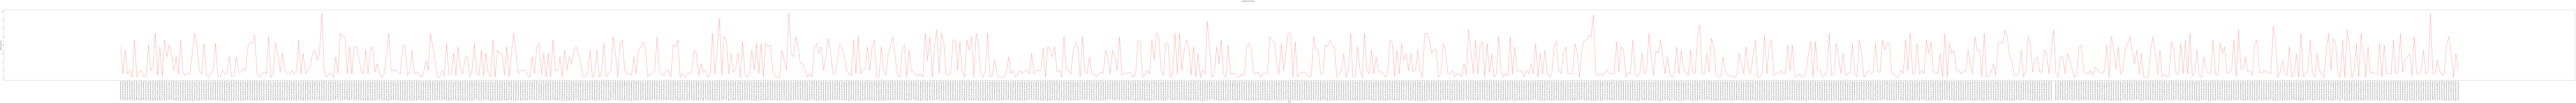

<Figure size 432x288 with 0 Axes>

In [19]:
plotter(most_frequent1(a.head(10000),'TOKEN')) #NB non lo fare per il log intero

Considerazioni sul plot B:
* utilità dubbia
* visibiità orrenda
* mi sembra che dica una cosa forse significativa, poichè le voci sono selezionate in ordine di tempo e sono poi contati tutti i messagi associati in quella frazione del log, alcuni che magari iniziano nello stesso tempo si sviluppano poi diversamente, cioè occorrono più volte di quello immediatamente dificanco che magari occorre una sola volta.

### Plot B alternative

Vorrei fare uno scatter, ovvero un plot a scatter dove per ogni token abbiamo su un asse la fdifferenza fra il  tempo in cui inizia e finisce (primo e ultimo valore) e sull'altro asse invece il numero di messaggi, quindi di occorrenze associate a quel token.

In [19]:
def alternative1(df):
    """
    create for each unique token a df containing all the rows related to that token,
    then uses timestamp of last and first row to find token duration. 
    """
    
    lista1=[]
    lista2=[]
    for token in df['TOKEN'].unique():
        df2 = df.loc[df.TOKEN == token]
        lista1.append(token)
        lista2.append(df2.tail(1)['TIMESTAMP'].values[0] - df2.head(1)['TIMESTAMP'].values[0])
    dizionario = {'TOKEN':lista1,'DELTA_T':lista2}
    DF3= pd.DataFrame.from_dict(dizionario)
    return DF3

In [41]:
def merge_w_occ(storm_df):
    """
    execute alternative1 and most_frequent on H rows of storm_df; then merge 2 resulting DFs by token in one DF
    """
    df1 = jingle3(storm_df)
    df2 = most_frequent(storm_df, 'TOKEN')
    final = pd.merge(df1,df2, on='TOKEN')
    #final = final['TOKEN','DELTA_T','OCCURENCIES']
    return final

In [42]:
def scatterer(scatter_df):
    """
    plots DF resulting from merge_w_occ
    """
    fig = plt.figure(figsize=(100,100))
    plt.scatter(scatter_df['OCCURENCIES'],scatter_df['DELTA_T'])
    #plt.text(10, 0, annotation, withdash=False,fontsize=10)
    #plt.subplots_adjust(right=0.7)
    plt.savefig('testbb.jpg', bbox_inches='tight')
    plt.grid()
    plt.show()

In [ ]:
scatterer(merge_w_occ(a))

## Plot C

“durata temporale dei token, e distribuzione temporale dei messages per token”. SOno due plots. Il primo prende la durata di ciasun token come la vedo svilupparsi nel log, e la plotto, viene una distribuzione. Il secondo e’ piu’ complicato: per un singolo token, voglio vedere in funzione del tempo quanto logga quel token ma anche come si sviluppa il logging (senza distinguere il contenuto dei messages). Isolando dunque tutti e soli i messages relativi a un token, bisogna guardare in che delta_t si sviluppano e dividere tale intervallo in pezzi e in ciascuno mettere le occorrenze di messages in quel sotto-intervallo. 

## Plot D

“profilo temporale dei DIVERSI messages in N token”. Se faccio questo plot con 1 solo token, mi aspetto una linea piatta..

## Plot ? : guardare alcune cose dei warn, cioè fare un po di grafici sui warn

## **---------------------------------------------------------------------------------------------------------------------------**

# <span style="color:yellow"> **DA QUI IN POI È FRITTO MISTO** </span>

## <span style="color:red"> FREQUENZA DI TIPI (1DAYLOG) </span>

In [ ]:
barrer2(most_frequent(a,'TYPE')[1:].head(20),True) #Togliere hashing per visualizzare tutto

## <span style="color:red"> FREQUENZA DI MESSAGE (HEAD, 1DAYLOG) </span>

In [ ]:
barrer2(most_frequent(a,'MESSAGE').head(100)[1:],True)

## <span style="color:red"> FREQUENZA DI MESSAGE (TAIL, 1DAYLOG) </span>

In [ ]:
barrer2(most_frequent(a,'MESSAGE').tail(20),True)

## <span style="color:red"> FREQUENZA DI THREAD (TOTALE, 1DAYLOG) </span> Fare con quello intermedio


In [ ]:
barrer2(most_frequent(a,'THREAD'),True)

<span style="color:red"> THREAD </span> sembra che ci siano in totale 301 thread assegnati alle istanze di stoRM (per atlas?) l'andamento è significativo perchè ci mostra che una giornata più o meno i thread ricoronno tutti lo stesso numero di volte con una differenza del 2% circa tra l'occorrenza minore e la maggiore. 
IPOTESI: Questo può significare che la macchina cerca sempre di distribuire le operazioni tra tutti i thread disponibili.

## <span style="color:red"> FREQUENZA DI TOKEN (HEAD(50), 1DAYLOG) </span> Anche per log intermedio


In [ ]:
barrer2(most_frequent(a,'TOKEN')[1:51],True)

## <span style="color:red"> FREQUENZA DI TOKEN (TAIL, 1DAYLOG) </span>


In [ ]:
barrer2(most_frequent(a,'TOKEN').head(20),True)

##  <span style="color:red"> Valori unici per ogni colonna </span> <br> NB:DA FARE ANCHE PER ORA per thread e token

In [ ]:
barrer1(b[:])

In [ ]:
WARNS_OCC = numb_of_for_val_occ(a,'TOKEN','MESSAGE',1)

## <span style="color:red"> FREQUENZA DEI MESSAGE PER I 5 TOKEN PIÙ FREQUENTI </span>


In [ ]:
MESSAGE_FOR_TOKEN = numb_of_for_val_occ(a,'TYPE','TOKEN',2)
barrer3(a,'TYPE','TOKEN',2,True)

NB : IL TYPE È WARN NON INFO. CORREGGERE IL GRAFICO

## <span style="color:red"> FREQUENZA DEI TOKEN PER I 5 THREAD PIÙ FREQUENTI </span>


In [ ]:
for i in range(5):
    TOKEN_FOR_THREAD = numb_of_for_val_occ(a,'THREAD','TOKEN',i)
    barrer3(a,'THREAD','TOKEN',i,True)

## <span style="color:red"> FREQUENZA DEI THREAD PER I 5 TOKEN PIÙ FREQUENTI </span>


In [ ]:
for i in range(5):
    THREAD_FOR_TOKEN = numb_of_for_val_occ(a,'TOKEN','THREAD',i)
    barrer3(a,'TOKEN','THREAD',i,True)

In [ ]:
barrer3(a, 'TYPE', 'TOKEN', 0, larg=20,alt=11)

#### <span style='color:red'> TOKEN ASSOCIATI A WARN + PRODUZIONE .CSV SPECIFICI </span>

In [19]:
def barrera(storm_df, label1, label2, fout):
    
    selected = ['WARN','ERROR']
    selection_df = storm_df.loc[storm_df[label1].isin(selected)]
    selection_df.to_csv(fout + '_' + label1 + '_selected.csv')
    
    labels = []
    for label in list(selection_df):
        labels.append(label)
    print labels